In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas.api import types
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import sklearn.tree as tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
# Load employee data
Gdata = pd.read_csv('/content/drive/My Drive/data/general_data.csv')
employee_survey_data = pd.read_csv('/content/drive/My Drive/data/employee_survey_data.csv')
manager_survey_data = pd.read_csv('/content/drive/My Drive/data/manager_survey_data.csv')

display(Gdata.head() , employee_survey_data.head() , manager_survey_data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [61]:
# Merging all three data frames
data = pd.merge(Gdata, employee_survey_data, on='EmployeeID')
data = pd.merge(data, manager_survey_data, on='EmployeeID')
# Drop rows with missing values
data.dropna(inplace=True)
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [62]:
# Exploratory data analysis (EDA)
data.describe()


,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,36.926977,9.197907,2.913256,1.0,2211.695116,2.066977,65059.844186,2.690000,15.210698,8.0,...,11.285116,2.796279,7.026047,2.190000,4.132558,2.723953,2.724884,2.761163,2.728837,3.153953
std,9.146517,8.097059,1.024774,0.0,1272.117692,1.106633,47045.398914,2.495764,3.662777,0.0,...,7.790052,1.290142,6.148036,3.230818,3.565831,1.093802,1.101875,0.707800,0.710769,0.360946
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1110.750000,1.000000,29260.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2215.500000,2.000000,49360.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3314.250000,3.000000,83802.500000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.250000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


<Axes: title={'center': 'Count of different gender'}, xlabel='Gender'>

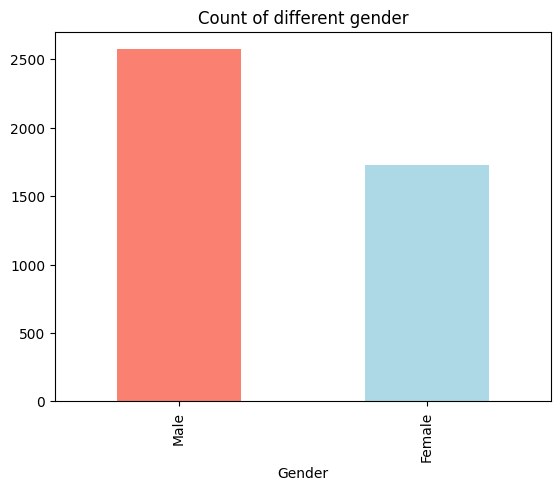

In [63]:
#Understanding the balancing of the Gender column visually
data['Gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

Now, let’s figure out that how gender could be the reason for employees to leave the company or to stay in.

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

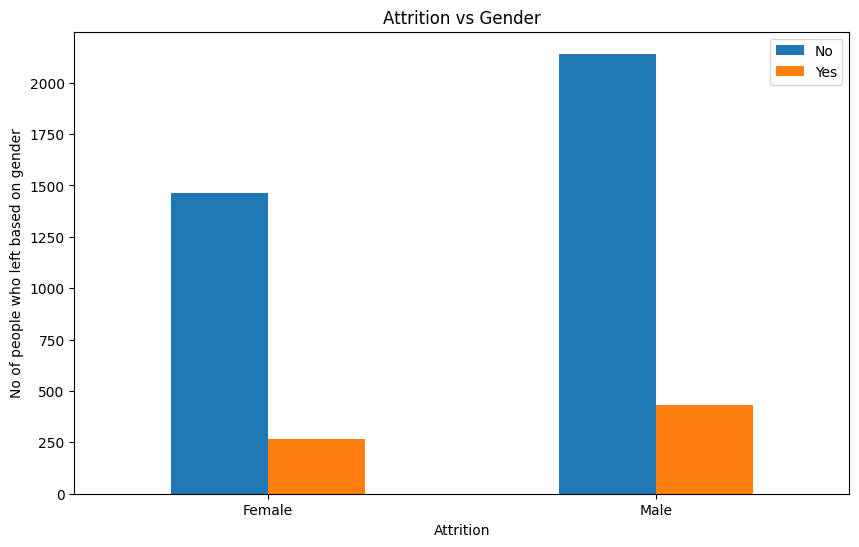

In [72]:

#Create a plot for crosstab

pd.crosstab(data['Gender'],data['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Attrition vs Gender")
plt.xlabel("Attrition")
plt.ylabel("No of people who left based on gender")
plt.legend(["No","Yes"])
plt.xticks(rotation=0)

In [73]:
#PercentSalaryHike
promoted_dict = data["PercentSalaryHike"].value_counts()
promoted_dict

PercentSalaryHike
11    616
13    616
14    583
12    577
15    296
18    260
17    236
16    230
19    224
22    167
20    158
21    142
23     82
24     59
25     54
Name: count, dtype: int64

<Axes: title={'center': 'Salary Hike'}, xlabel='PercentSalaryHike'>

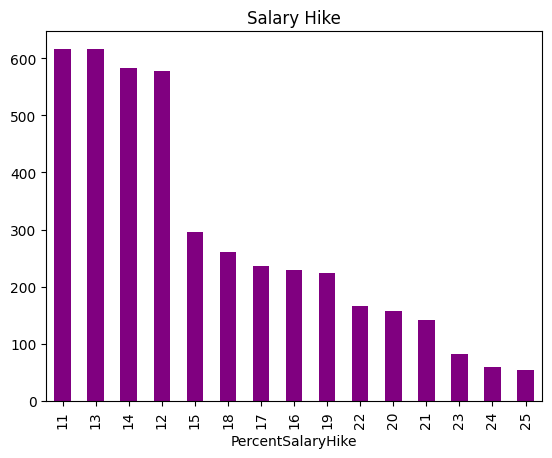

In [76]:
data["PercentSalaryHike"].value_counts().plot(kind='bar',color=['purple'],title= "Salary Hike")

In [ ]:
# convert the non-numeric columns to numeric
for column in data.columns:
  if not types.is_numeric_dtype(data[column]):
    data[column] = pd.Categorical(data[column])
    data[column] = data[column].cat.codes
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,2,2,6,2,1,1,1,0,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,1,1,10,1,1,1,2,0,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,1,1,17,4,4,1,3,1,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,0,1,2,5,1,1,4,1,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,2,1,10,1,3,1,5,1,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
# Create a Min/ Max Scaler object
matrix_data = data.copy()
scaler = MinMaxScaler()
# Select the columns to normalize except 'Attrition'
columns_to_normalize = data.columns[data.columns != 'Attrition']
# Normalize the selected columns
matrix_data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
matrix_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0.785714,0,1.0,1.0,0.178571,0.25,0.2,0.0,0.000000,0.0,...,0.025,1.000000,0.025,0.000000,0.000000,0.666667,1.000000,0.333333,0.666667,0.0
1,0.309524,1,0.5,0.5,0.321429,0.00,0.2,0.0,0.000227,0.0,...,0.150,0.500000,0.125,0.066667,0.235294,0.666667,0.333333,1.000000,0.333333,1.0
2,0.333333,0,0.5,0.5,0.571429,0.75,0.8,0.0,0.000454,1.0,...,0.125,0.333333,0.125,0.000000,0.176471,0.333333,0.333333,0.000000,0.666667,0.0
3,0.476190,0,0.0,0.5,0.035714,1.00,0.2,0.0,0.000681,1.0,...,0.325,0.833333,0.200,0.466667,0.294118,1.000000,1.000000,0.666667,0.333333,0.0
4,0.333333,0,1.0,0.5,0.321429,0.00,0.6,0.0,0.000907,1.0,...,0.225,0.333333,0.150,0.000000,0.235294,1.000000,0.000000,0.666667,0.666667,0.0


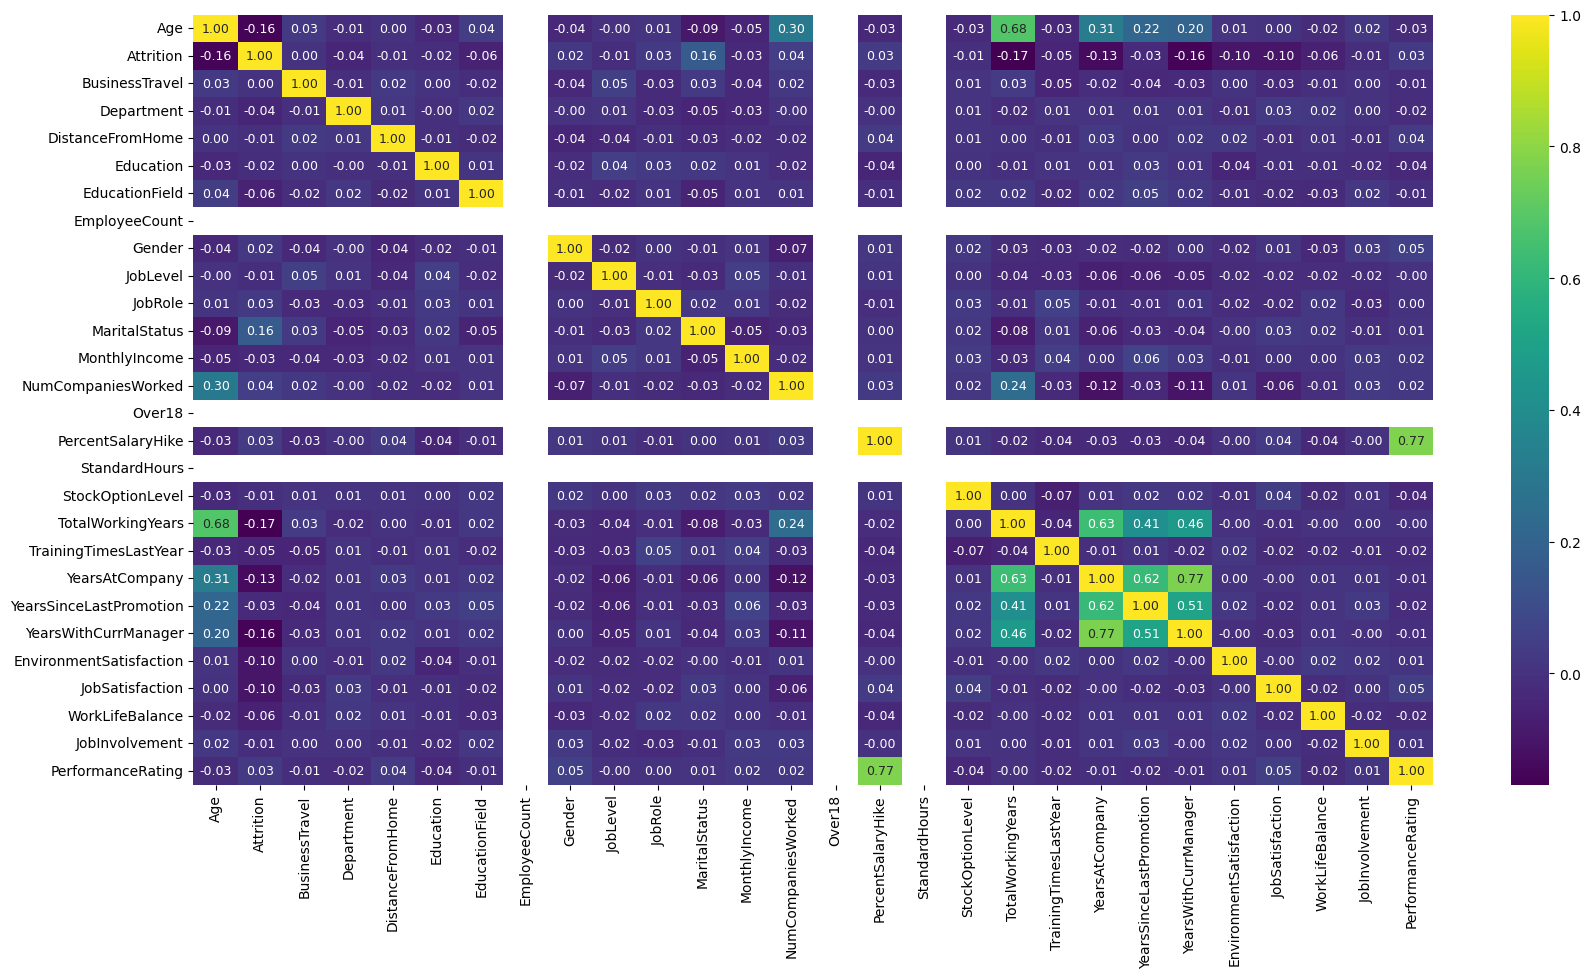

In [ ]:
corr_matrix = matrix_data.drop(columns=['EmployeeID']).corr()
plt.figure(figsize=(20, 10))

# Plot correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', annot_kws={'size': 9})

plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
# Feature Selection and Engineering

drop_columns = ['EmployeeID', 'EmployeeCount', 'StandardHours', 'Age', 'Over18', 'YearsAtCompany', 'YearsWithCurrManager']
trainin_data = data.drop(columns=drop_columns)
trainin_data.head()



,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0,2,2,6,2,1,0,1,0,1,...,11,0,1.0,6,0,3.0,4.0,2.0,3,3
1,1,1,1,10,1,1,0,1,6,2,...,23,1,6.0,3,1,3.0,2.0,4.0,2,4
2,0,1,1,17,4,4,1,4,7,1,...,15,3,5.0,2,0,2.0,2.0,1.0,3,3
3,0,0,1,2,5,1,1,3,1,1,...,11,3,13.0,5,7,4.0,4.0,3.0,2,3
4,0,2,1,10,1,3,1,1,7,2,...,12,2,9.0,2,0,4.0,1.0,3.0,3,3


In [ ]:
y = trainin_data["Attrition"]
X = trainin_data.drop("Attrition",axis=1)
#Splitting data – Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
X_train.head()

,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
1333,0,2,7,3,1,1,2,7,1,112450,...,21,0,8.0,3,0,3.0,2.0,4.0,3,4
2881,2,0,25,1,0,0,1,4,1,78470,...,14,1,9.0,3,1,4.0,4.0,1.0,4,3
3540,2,1,6,4,1,1,1,5,0,40310,...,12,1,26.0,3,4,4.0,3.0,3.0,2,3
206,2,1,8,1,1,1,1,7,2,41930,...,16,1,12.0,5,1,2.0,4.0,4.0,3,3
1052,1,1,10,4,5,0,1,8,1,29360,...,13,1,23.0,3,2,1.0,3.0,3.0,3,3


In [ ]:
# Initialize the models:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svm = svm.SVC(kernel='linear')


In [ ]:

#from one block of code, we will check the accuracy of all the model
for a,b in zip([lr,dt,knn,svm,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVM","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.838663
[Logistic Regression] test data accuracy is : 0.837209
[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.984884
[KNN] training data accuracy is : 0.989535
[KNN] test data accuracy is : 0.906977
[SVM] training data accuracy is : 0.833140
[SVM] test data accuracy is : 0.834884
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.988372
[Naive Bayes] training data accuracy is : 0.838663
[Naive Bayes] test data accuracy is : 0.837209


In [ ]:
#model score
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svm.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test)
             }
model_scores

{'Logistic Regression': 0.8372093023255814,
 'KNN classifier': 0.9069767441860465,
 'Support Vector Machine': 0.8348837209302326,
 'Random forest': 0.9883720930232558,
 'Decision tree': 0.9848837209302326,
 'Naive Bayes': 0.8372093023255814}

In [ ]:
#Classification Report of Random forest
from sklearn.metrics import classification_report

rm_y_preds = rm.predict(X_test)

print(classification_report(y_test,rm_y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       715
           1       1.00      0.92      0.96       145

    accuracy                           0.99       860
   macro avg       0.99      0.96      0.97       860
weighted avg       0.99      0.99      0.99       860



In [ ]:
#Classification Report of Logistic Regression
from sklearn.metrics import classification_report

lr_y_preds = lr.predict(X_test)

print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       715
           1       0.00      0.00      0.00       145

    accuracy                           0.83       860
   macro avg       0.42      0.50      0.45       860
weighted avg       0.69      0.83      0.75       860



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Model Comparison Based on the accuracy

model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes
accuracy,0.831395,0.884884,0.822093,0.986047,0.982558,0.831395


<Axes: >

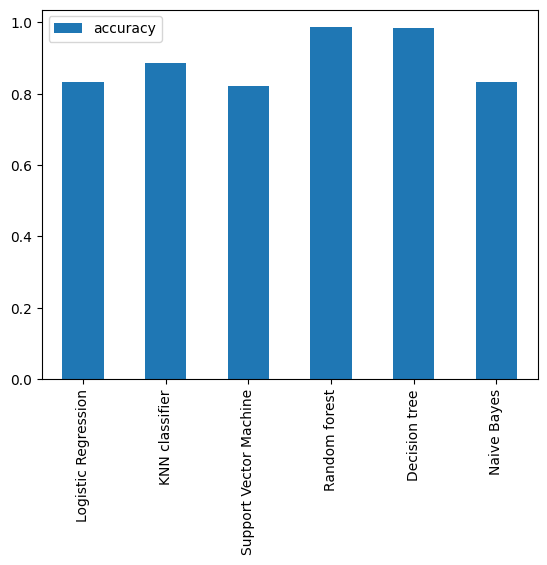

In [ ]:
#Visualize the accuracy of each model
model_compare.T.plot(kind='bar') # (T is here for transpose)

We can see that Random Forest has the best accuracy

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   int8   
 2   BusinessTravel           4300 non-null   int8   
 3   Department               4300 non-null   int8   
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   int8   
 7   EmployeeCount            4300 non-null   int64  
 8   EmployeeID               4300 non-null   int64  
 9   Gender                   4300 non-null   int8   
 10  JobLevel                 4300 non-null   int64  
 11  JobRole                  4300 non-null   int8   
 12  MaritalStatus            4300 non-null   int8   
 13  MonthlyIncome            4300 non-null   int64  
 14  NumCompaniesWorked       4300

In [57]:
# Set a random seed for reproducibility
np.random.seed(42)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
#random forest
# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

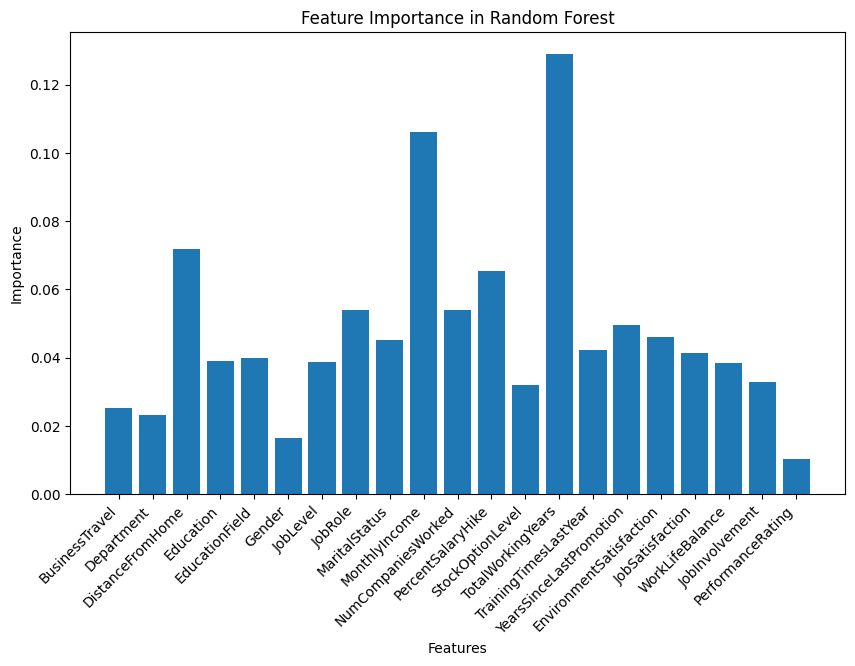

In [55]:
# Retrieve the feature importance from the model
feature_importance = rf_model.feature_importances_

# Plot the feature importance
features = X.columns
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=45, ha='right')
plt.show()

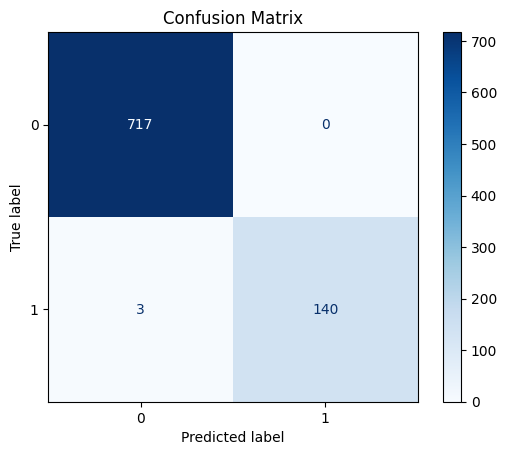

In [58]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as  plt

# Predict on the test set
y_pred = rf_model.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()